# Data Mining (2CSDE71)
## Name :- Harsh Pansuriya
## Roll No. :- 21BCE176
## Date :- 12th March, 2024
## Prac. No :- 6

#### Aim:- 
Implement Principal component analysis Dimensionality reduction technique.(Do not use any available library of PCA)

In [15]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [16]:
# Define column names
columns = ["Diastolic BP","Systolic BP","Weight","Height"]

# Create an empty DataFrame with column names
df = pd.DataFrame(columns=columns)

# Add values to the DataFrame
data = [
    [78,126,67,170],
    [80,128,77,177],
    [81,127,89,183],
    [82,130,90,187],
    [84,130,50,165],
    [86,132,55,164]
]

# Create a DataFrame from the data
data_df = pd.DataFrame(data, columns=columns)

print(data_df)

   Diastolic BP  Systolic BP  Weight  Height
0            78          126      67     170
1            80          128      77     177
2            81          127      89     183
3            82          130      90     187
4            84          130      50     165
5            86          132      55     164


### Steps of PCA :
Step 1 - Data normalization

Step 2 - Covariance matrix

Step 3 - Eigenvectors and eigenvalues

Step 4 - Selection of principal components

Step 5 - Data transformation in new dimensional space

In [17]:
# Data Normalization
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    # Handle cases where standard deviation is zero or very small
    std_dev[std_dev < 1e-8] = 1
    normalized_data = (data - mean) / std_dev
    return normalized_data, mean, std_dev

print(normalize_data(data_df[["Weight","Height"]])[0])

     Weight    Height
0 -0.280365 -0.497431
1  0.366631  0.306111
2  1.143027  0.994862
3  1.207727  1.454030
4 -1.380259 -1.071390
5 -1.056761 -1.186182


In [18]:
# Covariance matrix
def calculate_covariance_matrix(data):
    # Calculate the mean of each column
    means = data.mean()
    # Center the data by subtracting the mean from each element in each column
    centered_data = data - means
    # Calculate the covariance between each pair of centered columns
    num_columns = len(data.columns)
    cov_matrix = np.zeros((num_columns, num_columns))
    for i in range(num_columns):
        for j in range(num_columns):
            cov_matrix[i, j] = np.sum(centered_data.iloc[:, i] * centered_data.iloc[:, j]) / (len(data) - 1)
    # Assemble the covariance values into a matrix
    cov_mat = pd.DataFrame(cov_matrix, index=data.columns, columns=data.columns)
    return cov_mat

In [19]:
# Eigenvectors and Eigenvalues
def find_eigenvalues_eigenvectors(matrix):
    # Initialize the eigenvectors as identity matrix
    n = len(matrix)
    eigenvectors = np.eye(n)
    # Set the initial eigenvectors randomly
    eigenvectors[:, 0] = np.random.rand(n)
    
    # Perform power iteration method to find the eigenvectors
    for i in range(1, n):
        # Multiply matrix with current eigenvector estimate
        new_vector = np.dot(matrix, eigenvectors[:, i-1])
        # Normalize the new vector
        new_vector_norm = np.linalg.norm(new_vector)
        new_vector = new_vector / new_vector_norm
        # Update eigenvector estimate
        eigenvectors[:, i] = new_vector
    
    # Calculate eigenvalues from Rayleigh quotient
    eigenvalues = []
    for i in range(n):
        x = np.dot(eigenvectors[:, i], eigenvectors[:, i])
        y = np.dot(matrix.dot(eigenvectors[:, i]), eigenvectors[:, i])
        eigenvalue = ( y / x )
        eigenvalues.append(eigenvalue)
    
    return np.array(eigenvalues), eigenvectors

In [20]:
# Selection of principal components
def compute_variance_explained(eigenvalues):
    # Rank the eigenvalues in descending order
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    
    # Compute the percentage of variance explained by each component
    total_variance = np.sum(sorted_eigenvalues)
    variance_explained = sorted_eigenvalues / total_variance * 100
    
    return variance_explained

In [21]:
def keep_significant_eigenvectors(eigenvectors, variance_explained, threshold=10):
    # Find indices of eigenvectors with variance >= threshold
    significant_indices = np.where(variance_explained >= threshold)[0]
    
    # Create a matrix to store the feature vectors
    feature_vectors = np.zeros_like(eigenvectors)
    
    # Set the eigenvectors with significant variance
    for idx in significant_indices:
        feature_vectors[:, idx] = eigenvectors[:, idx]
    
    return feature_vectors

In [22]:
def project_data_onto_principal_components(data, feature_vectors):
    # Transpose the feature vectors
    transposed_feature_vectors = feature_vectors.T
    
    # Project the data onto the principal components
    projected_data = np.dot(transposed_feature_vectors, data.T)  # Transpose data
    
    return projected_data

In [23]:
normalized_data, mean, std_dev = normalize_data(data_df)

covariance_matrix = calculate_covariance_matrix(normalized_data)

eigenvalues, eigenvectors = find_eigenvalues_eigenvectors(covariance_matrix)
print(eigenvalues)
variance_explained = compute_variance_explained(eigenvalues)
for i, explained_variance in enumerate(variance_explained):
    print(f"PC{i+1}: {explained_variance:.2f}% of variance explained")
    
threshold = 30  # Variance threshold in percentage
feature_vectors = keep_significant_eigenvectors(eigenvectors, variance_explained, threshold)
print("Feature vectors:")
print(feature_vectors)

projected_data = project_data_onto_principal_components(normalized_data.values, feature_vectors)
print("Projected data onto principal components:")
print(projected_data)

[1.55269466 2.49576092 3.12860839 3.3082859 ]
PC1: 31.55% of variance explained
PC2: 29.84% of variance explained
PC3: 23.80% of variance explained
PC4: 14.81% of variance explained
Feature vectors:
[[0.40455876 0.         0.         0.        ]
 [0.04962735 0.         0.         0.        ]
 [0.56955988 0.         0.         0.        ]
 [0.64149927 0.         0.         0.        ]]
Projected data onto principal components:
[[-1.1423674   0.10055127  1.11527252  1.67493753 -1.10897502 -0.63941891]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


### Now we use this function for real world data

In [24]:
# Assuming the data is in a CSV file (adjust if needed)
dataset = pd.read_csv("/Users/harsh/Documents/DM/Database/hr_ds.csv")

# Selecting the desired columns
selected_data = dataset[["Salary", "PerformanceScore", "EngagementSurvey", "Absences"]]
selected_data.info()

# Rename the 'EngagementSurvey' column to 'EngagementScore'
selected_data = selected_data.rename(columns={'EngagementSurvey': 'EngagementScore'})

# Get unique values from the PerformanceScore column
unique_scores = selected_data['PerformanceScore'].unique()

# Create a mapping dictionary dynamically
performance_mapping = {score: i+1 for i, score in enumerate(unique_scores)}

# Convert PerformanceScore column from string to integer based on the mapping
selected_data['PerformanceScore'] = selected_data['PerformanceScore'].map(performance_mapping)

# Check the data types and information of the selected_data DataFrame
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Salary            311 non-null    int64  
 1   PerformanceScore  311 non-null    object 
 2   EngagementSurvey  311 non-null    float64
 3   Absences          311 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Salary            311 non-null    int64  
 1   PerformanceScore  311 non-null    int64  
 2   EngagementScore   311 non-null    float64
 3   Absences          311 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.8 KB


In [28]:
normalized_data, mean, std_dev = normalize_data(selected_data)
cov_matrix = calculate_covariance_matrix(normalized_data)
eigenvalues, eigenvectors = find_eigenvalues_eigenvectors(cov_matrix)
print(eigenvalues)
variance_explained = compute_variance_explained(eigenvalues)
for i, explained_variance in enumerate(variance_explained):
    print(f"PC{i+1}: {explained_variance:.2f}% of variance explained")
    
threshold = 20  # Variance threshold in percentage
feature_vectors = keep_significant_eigenvectors(eigenvectors, variance_explained, threshold)
print("Feature vectors:")
print(feature_vectors)

projected_data = project_data_onto_principal_components(normalized_data.values, feature_vectors)
print("Projected data onto principal components:")
print(projected_data)

[0.85375841 1.14315271 1.29723957 1.41570824]
PC1: 30.06% of variance explained
PC2: 27.54% of variance explained
PC3: 24.27% of variance explained
PC4: 18.13% of variance explained
Feature vectors:
[[ 0.50477152  0.67086985  0.63962389  0.        ]
 [ 0.2712204  -0.06440231 -0.32284068  0.        ]
 [ 0.41864546  0.36226541  0.37027391  0.        ]
 [ 0.48881039  0.64385539  0.59122957  0.        ]]
Projected data onto principal components:
[[-1.1167708   1.7182455  -1.27621577 ...  3.31232871  0.93317301
  -0.97436745]
 [-0.85450636  2.08401143 -1.40434705 ...  5.01712463  1.03671628
  -1.36649737]
 [-0.30737579  1.99760559 -1.33524556 ...  5.23266819  1.02359608
  -1.24859291]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


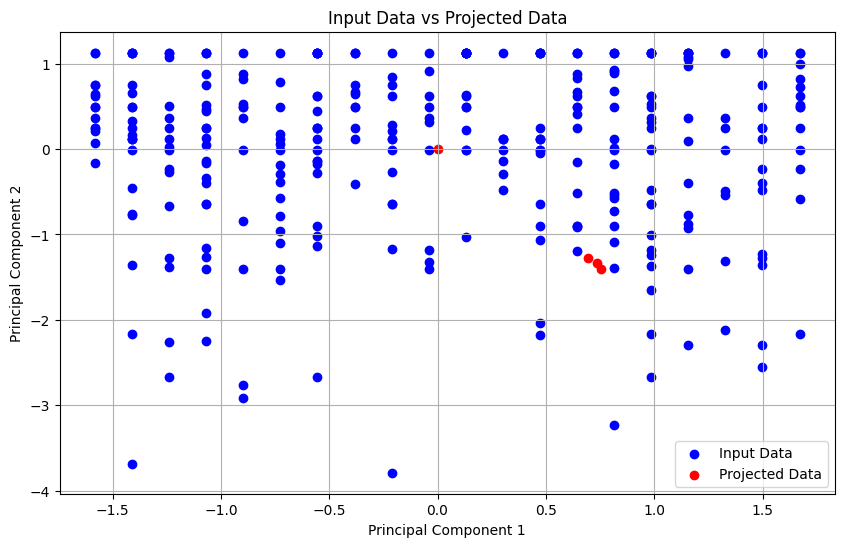

In [31]:
# Plot input data against output data
plt.figure(figsize=(10, 6))

# Plot input data
plt.scatter(normalized_data['Absences'], normalized_data['EngagementScore'], color='blue', label='Input Data')

# Plot projected data onto principal components
plt.scatter(projected_data[:, 3], projected_data[:, 2], color='red', label='Projected Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Input Data vs Projected Data')
plt.legend()
plt.grid(True)
plt.show()